In [256]:
import matplotlib.pyplot as plt

from Framework import Confounder_Injection as CI
from Framework import Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

# Experiments

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

## SimpleConv model

In [257]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[1, 4], [3, 6]] # confounder
    ]

With the test_network class it's easy to test new combinations parameters

### No confounder

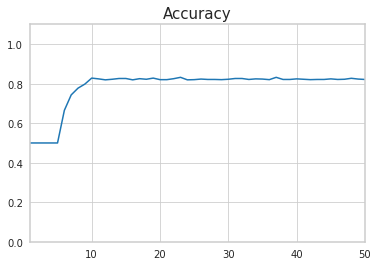

With mean accuracy= 0.78470703125


In [258]:
model = Models.SimpleConv()
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=0, test_confounding=0, split=1, params=params)
acc, loss = c.train(epochs=50, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

### Train- and testset confounded

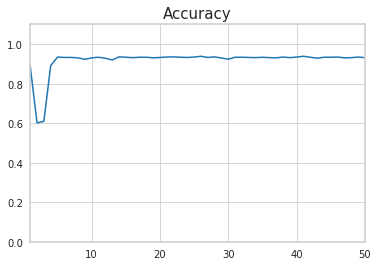

With mean accuracy= 0.91759765625


In [259]:
model = Models.SimpleConv()
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=1, split=1, params=params)
acc, loss = c.train(epochs=50, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

### Trainset confounded, testset 50% confounding

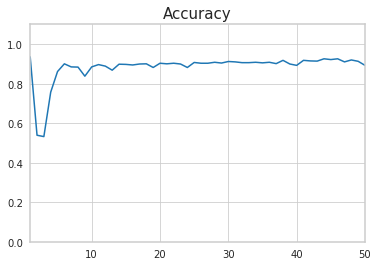

With mean accuracy= 0.88361328125


In [260]:
model = Models.SimpleConv()
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=0.5, split=1, params=params)
acc, loss = c.train(epochs=50, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

### Trainset confounded, testset unconfounded

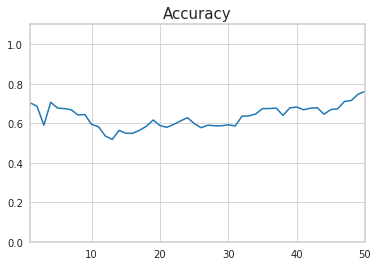

With mean accuracy= 0.632890625


In [261]:
model = Models.SimpleConv()
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=0, split=1, params=params)
acc, loss = c.train(epochs=50, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (1024, 2)


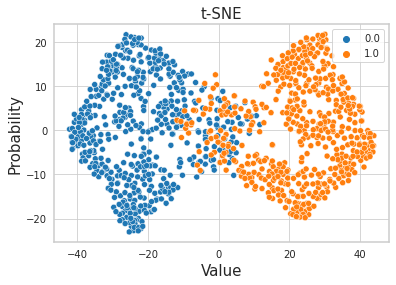

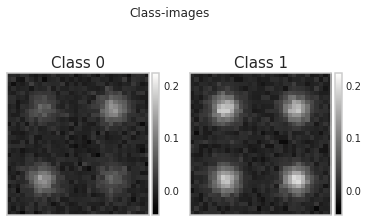

In [262]:
p = CI.plot()
p.tsne(c.train_x, c.train_y, 2)
p.class_images(c.train_x)

### Accuracy vs. confounding strength in testset

In [263]:
total_acc_mean, total_acc_max, total_loss, index = [], [], [], []
for i in np.arange(0,1,0.1):
    index.append(i)
    model = Models.SimpleConv()
    c = CI.confounder(model=model)
    c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=i, split=1, params=params)
    acc, loss = c.train(epochs=100, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
    total_acc_mean.append(np.mean(acc))
    total_acc_max.append(np.max(acc))
    total_loss.append(loss)

Text(0, 0.5, 'Mean accuracy')

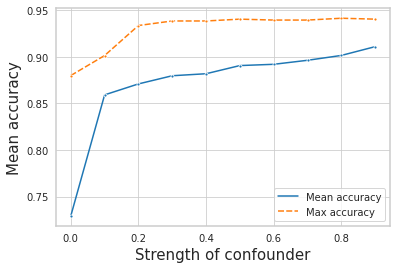

In [264]:
data = {'Mean accuracy':total_acc_mean, 'Max accuracy':total_acc_max}

data_df = pd.DataFrame(data, index=index)
sbs.lineplot(data=data_df, marker='.')
plt.xlabel("Strength of confounder")
plt.ylabel("Mean accuracy")

## NeuralNetwork model

### Accuracy vs. confounding strength in testset

In [265]:
total_acc_mean, total_acc_max, total_loss, index = [], [], [], []
for i in np.arange(0,1,0.1):
    index.append(i)
    model = Models.NeuralNetwork(32*32)
    c = CI.confounder(model=model)
    c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=i, split=1, params=params)
    acc, loss = c.train(epochs=100, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
    total_acc_mean.append(np.mean(acc))
    total_acc_max.append(np.max(acc))
    total_loss.append(loss)

Text(0, 0.5, 'Mean accuracy')

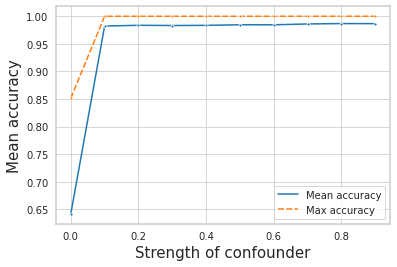

In [266]:
data = {'Mean accuracy':total_acc_mean, 'Max accuracy':total_acc_max}

data_df = pd.DataFrame(data, index=index)
sbs.lineplot(data=data_df, marker='.')
plt.xlabel("Strength of confounder")
plt.ylabel("Mean accuracy")

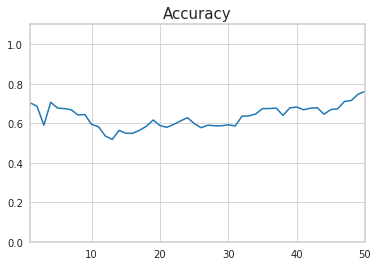

With mean accuracy= 0.632890625


In [250]:
model = Models.SimpleConv()
c = CI.confounder(model=model)
c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=0, split=1, params=params)
acc, loss = c.train(epochs=50, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
p = CI.plot()
p.acc_loss(acc, loss)

t_SNE shape:  (1024, 2)


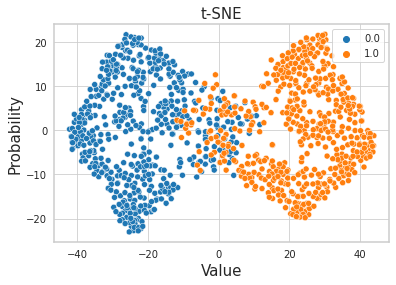

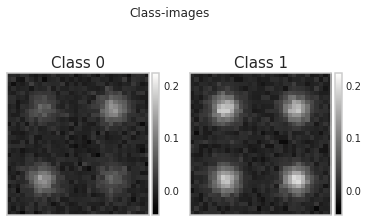

In [251]:
p = CI.plot()
p.tsne(c.train_x, c.train_y, 2)
p.class_images(c.train_x)

### Accuracy vs. confounding strength in testset

In [252]:
total_acc_mean, total_acc_max, total_loss, index = [], [], [], []
for i in np.arange(0,1,0.1):
    index.append(i)
    model = Models.SimpleConv()
    c = CI.confounder(model=model)
    c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=i, split=1, params=params)
    acc, loss = c.train(epochs=100, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
    total_acc_mean.append(np.mean(acc))
    total_acc_max.append(np.max(acc))
    total_loss.append(loss)

Text(0, 0.5, 'Mean accuracy')

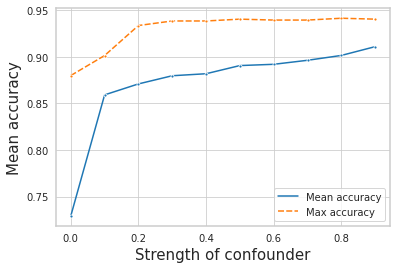

In [253]:
data = {'Mean accuracy':total_acc_mean, 'Max accuracy':total_acc_max}

data_df = pd.DataFrame(data, index=index)
sbs.lineplot(data=data_df, marker='.')
plt.xlabel("Strength of confounder")
plt.ylabel("Mean accuracy")

## NeuralNetwork model

### Accuracy vs. confounding strength in testset

In [254]:
total_acc_mean, total_acc_max, total_loss, index = [], [], [], []
for i in np.arange(0,1,0.1):
    index.append(i)
    model = Models.NeuralNetwork(32*32)
    c = CI.confounder(model=model)
    c.generate_data(training_data="br-net", samples=512, train_confounding=1, test_confounding=i, split=1, params=params)
    acc, loss = c.train(epochs=100, batch_size=64, optimizer=torch.optim.Adam(model.parameters()))
    total_acc_mean.append(np.mean(acc))
    total_acc_max.append(np.max(acc))
    total_loss.append(loss)

Text(0, 0.5, 'Mean accuracy')

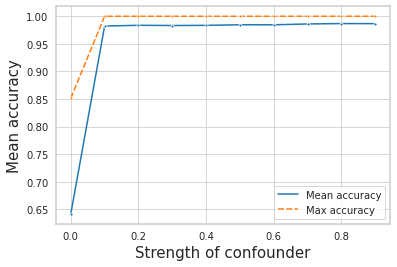

In [255]:
data = {'Mean accuracy':total_acc_mean, 'Max accuracy':total_acc_max}

data_df = pd.DataFrame(data, index=index)
sbs.lineplot(data=data_df, marker='.')
plt.xlabel("Strength of confounder")
plt.ylabel("Mean accuracy")